In [3]:
from Trajectory import M33AnalyticOrbit
import matplotlib.pyplot as plt
import matplotlib
from ReadFile import Read
import numpy as np
from OrbitCOM import OrbitCOM 

In [4]:
M31M33 = M33AnalyticOrbit('M33')

In [5]:
orbit = M31M33.OrbitIntegration(0, 0.1, 10)

Step:  1
Step:  2
Step:  3
Step:  4
Step:  5
Step:  6
Step:  7
Step:  8
Step:  9
Step:  10
Step:  11
Step:  12
Step:  13
Step:  14
Step:  15
Step:  16
Step:  17
Step:  18
Step:  19
Step:  20
Step:  21
Step:  22
Step:  23
Step:  24
Step:  25
Step:  26
Step:  27
Step:  28
Step:  29
Step:  30
Step:  31
Step:  32
Step:  33
Step:  34
Step:  35
Step:  36
Step:  37
Step:  38
Step:  39
Step:  40
Step:  41
Step:  42
Step:  43
Step:  44
Step:  45
Step:  46
Step:  47
Step:  48
Step:  49
Step:  50
Step:  51
Step:  52
Step:  53
Step:  54
Step:  55
Step:  56
Step:  57
Step:  58
Step:  59
Step:  60
Step:  61
Step:  62
Step:  63
Step:  64
Step:  65
Step:  66
Step:  67
Step:  68
Step:  69
Step:  70
Step:  71
Step:  72
Step:  73
Step:  74
Step:  75
Step:  76
Step:  77
Step:  78
Step:  79
Step:  80
Step:  81
Step:  82
Step:  83
Step:  84
Step:  85
Step:  86
Step:  87
Step:  88
Step:  89
Step:  90
Step:  91
Step:  92
Step:  93
Step:  94
Step:  95
Step:  96
Step:  97
Step:  98
Step:  99
Step:  100
Step:  1

In [12]:
MW_orbit = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True)
M31_orbit = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True)
M33_orbit = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True)
M33 = np.genfromtxt("output.txt", dtype=None, names=True)

In [13]:
def relMagnitude(a,b): 
    """Function to orbitpute the magnitude of the difference between two vectors. 
    Input: 
        a: 'np.array'
            vector 1
        b: 'np.array'
            vector 2
    Output: 
        magnitude of the difference between two vectors
    """
    
    if a.size == b.size : 
        rel = a - b
        mag = np.sqrt( rel[0]**2 + rel[1]**2 + rel[2]**2 )
    else: 
        raise TypeError("Two vector have different dimesions")
    
    return mag

In [14]:

#   store position vectors of all galaxies
MW_pos_vec = np.array([MW_orbit['x'], MW_orbit['y'], MW_orbit['z']])
M31_pos_vec = np.array([M31_orbit['x'], M31_orbit['y'], M31_orbit['z']])
M33_pos_vec = np.array([M33_orbit['x'], M33_orbit['y'], M33_orbit['z']])

#   store velocity vectors of all galaxies
MW_vel_vec = np.array([MW_orbit['vx'], MW_orbit['vy'], MW_orbit['vz']])
M31_vel_vec = np.array([M31_orbit['vx'], M31_orbit['vy'], M31_orbit['vz']])
M33_vel_vec = np.array([M33_orbit['vx'], M33_orbit['vy'], MW_orbit['vz']])

# of MW and M31
MW_M31_relpos = relMagnitude( MW_pos_vec, M31_pos_vec)  
MW_M31_relvel = relMagnitude( MW_vel_vec, M31_vel_vec) 
    
# of M33 and M31
M33_M31_relpos = relMagnitude( M33_pos_vec, M31_pos_vec)   
M33_M31_relvel = relMagnitude( M33_vel_vec, M31_vel_vec)  


M33_tra_pos = np.sqrt( M33['x']**2 + M33['y']**2 + M33['z']**2 )
M33_tra_vel = np.sqrt( M33['vx']**2 + M33['vy']**2 + M33['vz']**2 )



(102,)
(102,)


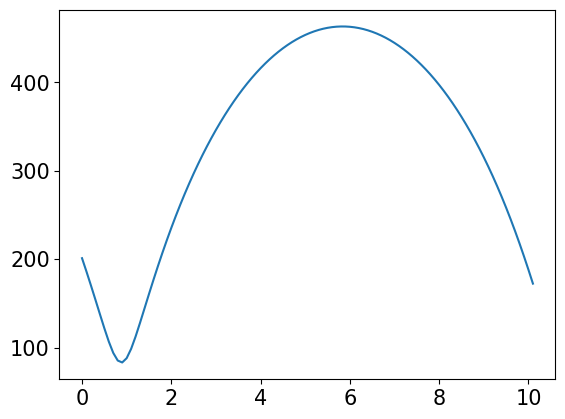

In [15]:
plt.plot(M33['t'], M33_tra_pos)

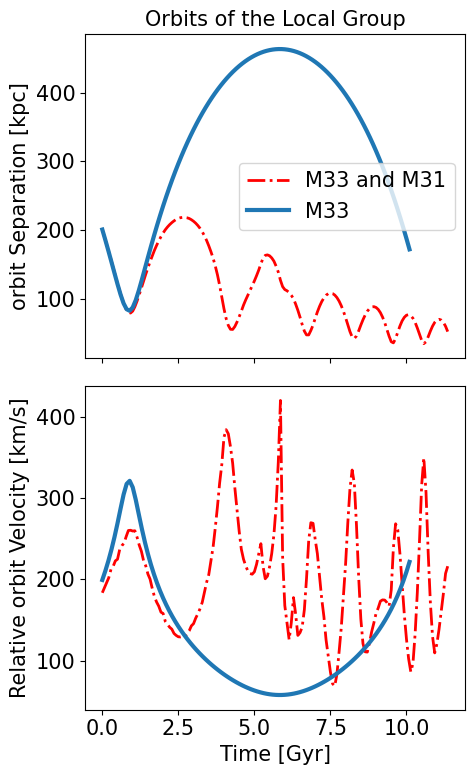

In [11]:
# set up plots
fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

# set fontsize 
plt.rcParams['font.size'] = 15

ax = axes[0]
# Plot the separtion of M31 and MW
ax.plot(M31_orbit['t'], M33_M31_relpos, c='r', lw=2, ls="-.", label='M33 and M31')
ax.plot(M33['t'], M33_tra_pos, lw=3, label='M33')

ax.set(ylabel='orbit Separation [kpc]')
ax.set_title("Orbits of the Local Group", fontsize=15)

ax = axes[1]
ax.plot(M31_orbit['t'], M33_M31_relvel, c='r', lw=2, ls="-.", label='M33 and M31')
ax.plot(M33['t'], M33_tra_vel, lw=3, label='M33')

ax.set(ylabel='Relative orbit Velocity [km/s]', xlabel='Time [Gyr]')

plt.tight_layout()
ax.legend(loc='upper right', fontsize=15)
plt.savefig('Homework6_orbits.png', bbox_inches='tight')